In [1]:
import matplotlib.pyplot as plt
import pandas
import gripql
conn = gripql.Connection("https://bmeg.io/api", credential_file="bmeg_credentials.json")
O = conn.graph("bmeg_rc2")

## Get BRCA1 start and stop locations

In [2]:
loc = list( O.query().V().hasLabel("Gene").has(gripql.eq("symbol", "BRCA1")).render(["$.start", "$.end"]) )[0]

[INFO]	2019-07-26 17:48:09,443	1 results received in 0 seconds


In [15]:
counts = [0] * (loc[1]-loc[0])
q = O.query().V().hasLabel("Gene").has(gripql.eq("symbol", "BRCA1")).out("alleles").has(gripql.eq("type", "SNP"))
q = q.aggregate(gripql.term("brac1_pos", "start"))
res = list(q)[0]
for v in res.brac1_pos.buckets:
    counts[ v['key'] - loc[0] ] = v['value']

[INFO]	2019-07-26 17:51:52,104	1 results received in 0 seconds


In [16]:
s = pandas.DataFrame(counts)

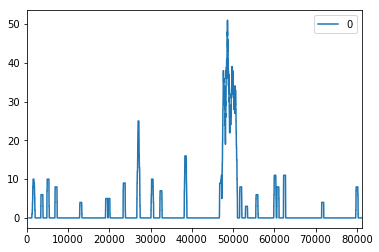

In [17]:
s.rolling(500).sum().plot()